# Upload data and set up train-test split

## Upload data

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [97]:
data = pd.read_csv('kc_house_data_cleaned.csv')

In [98]:
data.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,0,98178,25363,262,10.3,0
1,1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,98178,25363,262,10.3,0
2,2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,98178,25363,262,10.3,0
3,3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,98178,25363,262,10.3,0
4,4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,98178,25363,262,10.3,0


In [99]:
data.shape

(21592, 17)

In [100]:
data.dtypes

Unnamed: 0            int64
price               float64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront            int64
grade                 int64
sqft_basement       float64
yr_built              int64
yr_renovated          int64
zipcode               int64
zipcode_pop           int64
listings_in_zip       int64
hot_market_score    float64
recent_renov          int64
dtype: object

## Check out a model of the data

In [101]:
from statsmodels.formula.api import ols

In [102]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 'yr_built',
              'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov']

In [103]:
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3054.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:54:56   Log-Likelihood:            -2.9579e+05
No. Observations:               21592   AIC:                         5.916e+05
Df Residuals:                   21578   BIC:                         5.917e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.814e+06   1.25e+05     54.556      0.000    6.57e+06    7.06e+06
bedrooms         -4.162e+04   2119.941    -19.630      0.000   -4.58e+04   -3.75e+04
bathrooms         4.673e+04   3482.312     13.420      0.000    3.99e+04    5.36e+04
sqft_living        168.5632      3.557     47.391      0.000     161.591     175.535
sqft_lot            -0.2978      0.038     -7.765      0.000      -0.373      -0.223
floors            2.209e+04   3697.104      5.976      0.000    1.48e+04    2.93e+04
waterfront        7.412e+05   1.82e+04     40.812      0.000    7.06e+05    7.77e+05
grade             1.315e+05   2159.190     60.918      0.000    1.27e+05    1.36e+05
sqft_basement       19.1676      4.372      4.384      0.000      10.598      27.737
yr_built         -3821.3997     66.178    -57.744      0.000   -3951.114   -3691.686
zipcode_pop         -4.1765      0.488     -8.551      0.000      -5.134      -3.219
listings_in_zip    253.1980     39.902      6.345      0.000     174.986     331.410
hot_market_score -4828.4710   1203.155     -4.013      0.000   -7186.744   -2470.198
recent_renov      4.487e+04   9837.028      4.562      0.000    2.56e+04    6.42e+04
==============================================================================
Omnibus:                    15031.811   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           764598.069
Skew:                           2.773   Prob(JB):                         0.00
Kurtosis:                      31.620   Cond. No.                     3.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check variable distributions

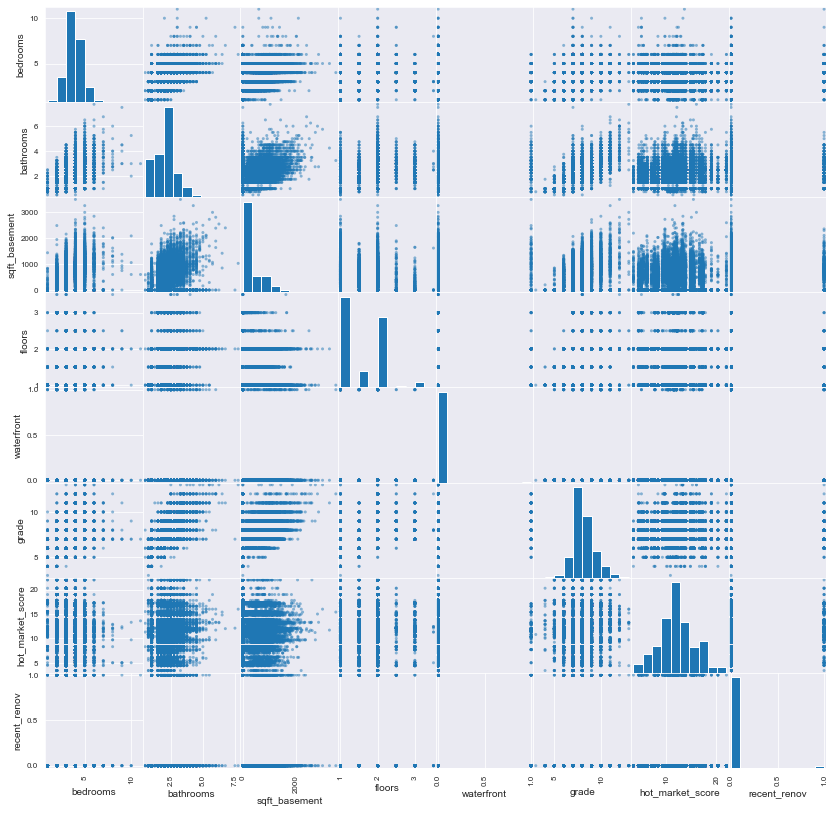

In [138]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(14,14));

I have no idea how to read this.

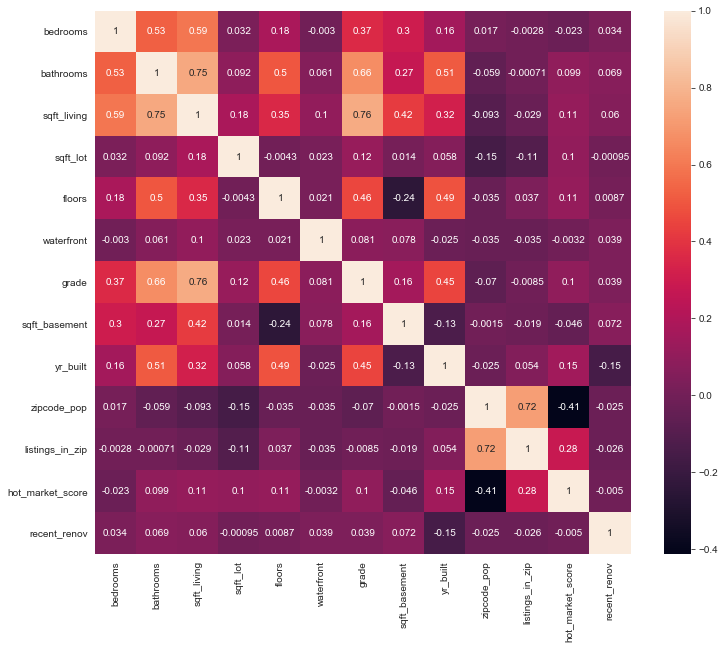

In [137]:
plt.figure(figsize=(12,10))
sns.heatmap(data[chosen_cols].corr(), annot=True);

## Model for inference

I'm modeling for inference, not predictors. Basically, I'm trying to advise a real estate company on how to price their properties.  

Let me try to re-run a model based only on house characteristics.

In [139]:
characteristics = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement']

In [140]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3627.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:57:54   Log-Likelihood:            -2.9866e+05
No. Observations:               21592   AIC:                         5.973e+05
Df Residuals:                   21584   BIC:                         5.974e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       8.09e+04   7557.752     10.704      0.000    6.61e+04    9.57e+04
bedrooms      -5.781e+04   2360.084    -24.494      0.000   -6.24e+04   -5.32e+04
bathrooms      5838.2394   3684.908      1.584      0.113   -1384.452    1.31e+04
sqft_living     297.4430      3.253     91.443      0.000     291.067     303.819
sqft_lot         -0.3892      0.043     -8.986      0.000      -0.474      -0.304
floors          1.11e+04   4113.389      2.697      0.007    3032.987    1.92e+04
waterfront     8.167e+05   2.07e+04     39.469      0.000    7.76e+05    8.57e+05
sqft_basement    23.5438      4.842      4.862      0.000      14.052      33.035
==============================================================================
Omnibus:                    12147.378   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           282012.228
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      20.128   Cond. No.                     5.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I still get a large condition number and an even lower $R^2$. Then again, $R^2$ increases whenever you add a new predictor. Since this model has fewer predictors, it makes sense that it is less.

# Play around with models

I'm going to try just a few characteristics at a time.

## Bedrooms and Bathrooms 

In [141]:
# characteristics = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement']
characteristics = ['bedrooms', 'bathrooms']

In [142]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     4100.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:58:02   Log-Likelihood:            -3.0358e+05
No. Observations:               21592   AIC:                         6.072e+05
Df Residuals:                   21589   BIC:                         6.072e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.958e+04   8355.343     -3.541      0.000    -4.6e+04   -1.32e+04
bedrooms    2.231e+04   2738.289      8.149      0.000    1.69e+04    2.77e+04
bathrooms   2.336e+05   3228.956     72.337      0.000    2.27e+05     2.4e+05
==============================================================================
Omnibus:                    16475.423   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           687633.598
Skew:                           3.282   Prob(JB):                         0.00
Kurtosis:                      29.856   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks OK

## Square foot characteristics 

### sqft_living

In [143]:
characteristics = ['sqft_living', 'sqft_lot', 'sqft_basement']

In [144]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     6924.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:58:09   Log-Likelihood:            -2.9978e+05
No. Observations:               21592   AIC:                         5.996e+05
Df Residuals:                   21588   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.765e+04   4435.855     -8.487      0.000   -4.63e+04    -2.9e+04
sqft_living     277.6637      2.175    127.682      0.000     273.401     281.926
sqft_lot         -0.3018      0.045     -6.694      0.000      -0.390      -0.213
sqft_basement    16.0825      4.456      3.610      0.000       7.349      24.816
==============================================================================
Omnibus:                    14084.870   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427796.288
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      24.137   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
characteristics = ['sqft_living']

In [146]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:58:12   Log-Likelihood:            -2.9981e+05
No. Observations:               21592   AIC:                         5.996e+05
Df Residuals:                   21590   BIC:                         5.996e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.945e+04   4399.510     -8.967      0.000   -4.81e+04   -3.08e+04
sqft_living   278.5582      1.938    143.716      0.000     274.759     282.357
==============================================================================
Omnibus:                    14171.423   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433967.175
Skew:                           2.702   Prob(JB):                         0.00
Kurtosis:                      24.287   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

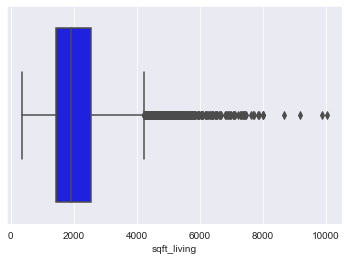

In [147]:
sns.boxplot(x=data['sqft_living'], color='b')

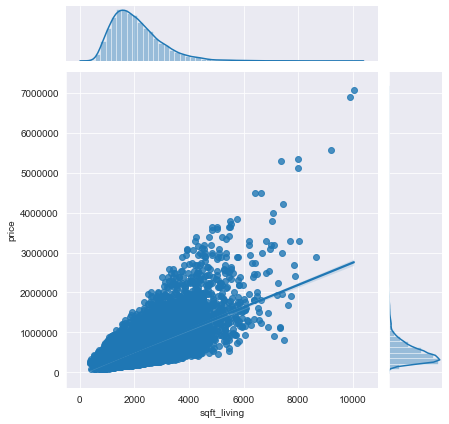

In [148]:
sns.jointplot(x = data['sqft_living'], y = data.price, kind='reg')

In [149]:
data2 = data[data.sqft_living < 8000]

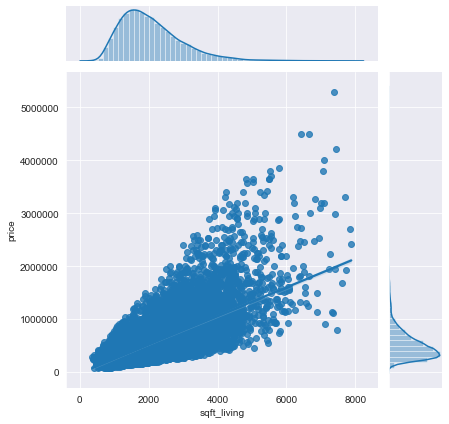

In [150]:
sns.jointplot(x = data2['sqft_living'], y = data2.price, kind='reg')

In [151]:
characteristics = ['sqft_living']

In [152]:
outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                 2.009e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:58:31   Log-Likelihood:            -2.9921e+05
No. Observations:               21585   AIC:                         5.984e+05
Df Residuals:                   21583   BIC:                         5.984e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.445e+04   4328.099     -5.650      0.000   -3.29e+04    -1.6e+04
sqft_living   270.9076      1.911    141.745      0.000     267.161     274.654
==============================================================================
Omnibus:                    12062.611   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200427.259
Skew:                           2.337   Prob(JB):                         0.00
Kurtosis:                      17.178   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Still large even without those outliers.

### sqft_lot 

In [153]:
characteristics = ['sqft_lot']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           1.09e-41
Time:                        10:58:34   Log-Likelihood:            -3.0696e+05
No. Observations:               21592   AIC:                         6.139e+05
Df Residuals:                   21590   BIC:                         6.139e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.271e+05   2627.914    200.586      0.000    5.22e+05    5.32e+05
sqft_lot       0.8367      0.062     13.556      0.000       0.716       0.958
==============================================================================
Omnibus:                    17993.101   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           798749.489
Skew:                           3.757   Prob(JB):                         0.00
Kurtosis:                      31.834   Cond. No.                     4.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again, I get the warning.

### sqft_basement

In [154]:
characteristics = ['sqft_basement']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2342.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:58:36   Log-Likelihood:            -3.0594e+05
No. Observations:               21592   AIC:                         6.119e+05
Df Residuals:                   21590   BIC:                         6.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.657e+05   2800.111    166.307      0.000     4.6e+05    4.71e+05
sqft_basement   259.4956      5.362     48.394      0.000     248.985     270.006
==============================================================================
Omnibus:                    17136.670   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           680246.571
Skew:                           3.515   Prob(JB):                         0.00
Kurtosis:                      29.584   Cond. No.                         623.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No warning for this one 

### floors

In [155]:
characteristics = ['floors']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1543.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:58:39   Log-Likelihood:            -3.0631e+05
No. Observations:               21592   AIC:                         6.126e+05
Df Residuals:                   21590   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.802e+05   7023.994     39.886      0.000    2.66e+05    2.94e+05
floors      1.737e+05   4421.800     39.283      0.000    1.65e+05    1.82e+05
==============================================================================
Omnibus:                    18196.551   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           876845.799
Skew:                           3.793   Prob(JB):                         0.00
Kurtosis:                      33.284   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### waterfront

In [123]:
characteristics = ['waterfront']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1594.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:56:11   Log-Likelihood:            -3.0629e+05
No. Observations:               21592   AIC:                         6.126e+05
Df Residuals:                   21590   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.319e+05   2391.259    222.417      0.000    5.27e+05    5.37e+05
waterfront  1.165e+06   2.92e+04     39.924      0.000    1.11e+06    1.22e+06
==============================================================================
Omnibus:                    16358.780   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           570657.378
Skew:                           3.315   Prob(JB):                         0.00
Kurtosis:                      27.297   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### grade

In [124]:
characteristics = ['grade']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 1.760e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:56:11   Log-Likelihood:            -3.0062e+05
No. Observations:               21592   AIC:                         6.012e+05
Df Residuals:                   21590   BIC:                         6.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.049e+06   1.21e+04    -86.604      0.000   -1.07e+06   -1.03e+06
grade       2.075e+05   1564.054    132.674      0.000    2.04e+05    2.11e+05
==============================================================================
Omnibus:                    18389.318   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1326708.171
Skew:                           3.700   Prob(JB):                         0.00
Kurtosis:                      40.682   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The problems are in `sqft_lot` and `sqft_living`.**

## Market characteristics

### yr_built

In [125]:
characteristics = ['yr_built']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     68.30
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           1.49e-16
Time:                        10:56:12   Log-Likelihood:            -3.0702e+05
No. Observations:               21592   AIC:                         6.140e+05
Df Residuals:                   21590   BIC:                         6.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.277e+05   1.65e+05     -5.002      0.000   -1.15e+06   -5.03e+05
yr_built     693.7659     83.949      8.264      0.000     529.220     858.312
==============================================================================
Omnibus:                    17968.463   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           788089.584
Skew:                           3.753   Prob(JB):                         0.00
Kurtosis:                      31.629   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Gets the warning

### zipcode_pop

In [126]:
characteristics = ['zipcode_pop']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           1.75e-68
Time:                        10:56:12   Log-Likelihood:            -3.0690e+05
No. Observations:               21592   AIC:                         6.138e+05
Df Residuals:                   21590   BIC:                         6.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.593e+05   7240.924     91.046      0.000    6.45e+05    6.73e+05
zipcode_pop    -3.6849      0.210    -17.551      0.000      -4.096      -3.273
==============================================================================
Omnibus:                    17875.753   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           779945.767
Skew:                           3.724   Prob(JB):                         0.00
Kurtosis:                      31.486   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Gets the warning

### listings_in_zip

In [127]:
characteristics = ['listings_in_zip']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     53.04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           3.39e-13
Time:                        10:56:12   Log-Likelihood:            -3.0703e+05
No. Observations:               21592   AIC:                         6.141e+05
Df Residuals:                   21590   BIC:                         6.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.89e+05   7202.483     81.772      0.000    5.75e+05    6.03e+05
listings_in_zip  -132.0632     18.134     -7.283      0.000    -167.607     -96.519
==============================================================================
Omnibus:                    17817.511   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           770056.887
Skew:                           3.708   Prob(JB):                         0.00
Kurtosis:                      31.301   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

gets the warning

### hot market score

In [128]:
characteristics = ['hot_market_score']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     176.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           4.38e-40
Time:                        10:56:12   Log-Likelihood:            -3.0697e+05
No. Observations:               21592   AIC:                         6.139e+05
Df Residuals:                   21590   BIC:                         6.140e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.265e+05   8869.945     48.085      0.000    4.09e+05    4.44e+05
hot_market_score  9419.5414    709.337     13.279      0.000    8029.188    1.08e+04
==============================================================================
Omnibus:                    18191.197   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           817719.562
Skew:                           3.819   Prob(JB):                         0.00
Kurtosis:                      32.164   Cond. No.                         45.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OK

### recent renov

In [129]:
characteristics = ['recent_renov']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     319.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           5.26e-71
Time:                        10:56:12   Log-Likelihood:            -3.0690e+05
No. Observations:               21592   AIC:                         6.138e+05
Df Residuals:                   21590   BIC:                         6.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.328e+05   2481.657    214.690      0.000    5.28e+05    5.38e+05
recent_renov  2.857e+05    1.6e+04     17.882      0.000    2.54e+05    3.17e+05
==============================================================================
Omnibus:                    17892.296   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           778835.465
Skew:                           3.730   Prob(JB):                         0.00
Kurtosis:                      31.461   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OK

## More multicollinearity troubleshooting

Trying with just those that did not get warning

In [130]:
characteristics = ['bedrooms', 'bathrooms', 'sqft_basement', 'floors', 'waterfront', 'grade', 
                   'hot_market_score', 'recent_renov']

outcome = 'price'
x_cols = characteristics
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3172.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:56:12   Log-Likelihood:            -2.9866e+05
No. Observations:               21592   AIC:                         5.973e+05
Df Residuals:                   21583   BIC:                         5.974e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -9.96e+05   1.35e+04    -73.783      0.000   -1.02e+06    -9.7e+05
bedrooms          7308.4409   2235.495      3.269      0.001    2926.705    1.17e+04
bathrooms         3.277e+04   3544.183      9.246      0.000    2.58e+04    3.97e+04
sqft_basement      145.5418      4.566     31.873      0.000     136.592     154.492
floors           -4940.4364   4132.163     -1.196      0.232    -1.3e+04    3158.908
waterfront        8.688e+05   2.07e+04     42.048      0.000    8.28e+05    9.09e+05
grade             1.765e+05   1960.201     90.051      0.000    1.73e+05     1.8e+05
hot_market_score  3824.7783    488.975      7.822      0.000    2866.350    4783.206
recent_renov      1.737e+05    1.1e+04     15.843      0.000    1.52e+05    1.95e+05
==============================================================================
Omnibus:                    16267.548   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           897464.875
Skew:                           3.114   Prob(JB):                         0.00
Kurtosis:                      33.964   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This does raise the warning again.

In [156]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [157]:
characteristics = ['bedrooms', 'bathrooms', 'sqft_basement', 'floors', 'waterfront', 'grade', 
                   'hot_market_score', 'recent_renov']
X = data.loc[:, characteristics]
X
calc_vif(X)

,variables,VIF
0,bedrooms,19.092380
1,bathrooms,19.388973
2,sqft_basement,2.027614
3,floors,15.312776
4,waterfront,1.021286
5,grade,38.935575
6,hot_market_score,11.326385
7,recent_renov,1.033930


For those with a high VIF value, it means they can be predicted by other independent variables in the dataset.

Now let me try it with the all the chosen columns.

In [158]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 'yr_built',
              'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov']
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,25.222366
1,bathrooms,25.016799
2,sqft_living,30.268718
3,sqft_lot,1.240747
4,floors,15.630725
5,waterfront,1.027909
6,grade,129.216182
7,sqft_basement,2.357154
8,yr_built,226.187036
9,zipcode_pop,132.012879


# Recalibrate data

## Set up yr_built as categorical

In [159]:
data.yr_built.describe()

count    21592.000000
mean      1971.004122
std         29.372465
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

I'll set up six categories:  
1. 1900-1919  
2. 1920-1939  
3. 1940-1959  
4. 1960-1979  
5. 1980-1999  
6. 2000-2015  

In [160]:
# test the filter
data[data.yr_built <= 1919].head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
18,18,825000.0,2,1.0,1150,12775,1.0,1,6,0.0,1908,0,98178,25363,262,10.3,0
37,37,400000.0,6,2.0,2350,6554,2.0,0,8,350.0,1905,0,98178,25363,262,10.3,0
40,40,210000.0,3,1.0,1200,7500,1.0,0,6,0.0,1905,1989,98178,25363,262,10.3,0
48,48,160000.0,2,1.0,1180,9350,1.0,0,6,0.0,1918,0,98178,25363,262,10.3,0
101,101,315000.0,4,2.0,1780,5336,1.5,0,6,0.0,1918,0,98178,25363,262,10.3,0


In [167]:
# get rid of that extra column
data.drop(data.columns[0], axis=1, inplace=True)

Create a new column

In [169]:
data.columns[9]

'yr_built'

In [170]:
data.insert(10, "grouped_yr_built", 0)

In [171]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,0,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,0,98178,25363,262,10.3,0


In [194]:
# testing it out
for i, j in data[0:5].iterrows(): 
    if j.yr_built == 1955:
        print('yes')
        data.at[i, 'grouped_yr_built'] = 3
    else:
        print('no')
data.head(5)

yes
no
no
no
no


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,3,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,0,98178,25363,262,10.3,0


I'll set up six categories:  
1. 1900-1919  
2. 1920-1939  
3. 1940-1959  
4. 1960-1979  
5. 1980-1999  
6. 2000-2015  

In [197]:
# assigning category number to grouped_yr_built
for i, j in data.iterrows(): 
    if j.yr_built <= 1919:
        data.at[i, 'grouped_yr_built'] = 1
    if j.yr_built >= 1920 and j.yr_built <=1939:
        data.at[i, 'grouped_yr_built'] = 2
    if j.yr_built >= 1940 and j.yr_built <=1959:
        data.at[i, 'grouped_yr_built'] = 3
    if j.yr_built >= 1960 and j.yr_built <=1979:
        data.at[i, 'grouped_yr_built'] = 4
    if j.yr_built >= 1980 and j.yr_built <=1999:
        data.at[i, 'grouped_yr_built'] = 5
    if j.yr_built >= 2000 and j.yr_built <=2015:
        data.at[i, 'grouped_yr_built'] = 6

In [198]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,3,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,3,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,4,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,4,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,2,0,98178,25363,262,10.3,0


In [201]:
data.grouped_yr_built.describe()

count    21592.000000
mean         4.093646
std          1.482966
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: grouped_yr_built, dtype: float64

In [204]:
grouped_yr_built_dummies = pd.get_dummies(data['grouped_yr_built'], prefix='group_yr_built')

In [207]:
data = pd.concat([data, grouped_yr_built_dummies], axis=1)
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,...,zipcode_pop,listings_in_zip,hot_market_score,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,...,25363,262,10.3,0,0,0,1,0,0,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,...,25363,262,10.3,0,0,0,1,0,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,...,25363,262,10.3,0,0,0,0,1,0,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,...,25363,262,10.3,0,0,0,0,1,0,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,...,25363,262,10.3,0,0,1,0,0,0,0


In [208]:
data.drop(['grouped_yr_built'], axis=1, inplace=True)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21592 entries, 0 to 21591
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21592 non-null  float64
 1   bedrooms          21592 non-null  int64  
 2   bathrooms         21592 non-null  float64
 3   sqft_living       21592 non-null  int64  
 4   sqft_lot          21592 non-null  int64  
 5   floors            21592 non-null  float64
 6   waterfront        21592 non-null  int64  
 7   grade             21592 non-null  int64  
 8   sqft_basement     21592 non-null  float64
 9   yr_built          21592 non-null  int64  
 10  yr_renovated      21592 non-null  int64  
 11  zipcode           21592 non-null  int64  
 12  zipcode_pop       21592 non-null  int64  
 13  listings_in_zip   21592 non-null  int64  
 14  hot_market_score  21592 non-null  float64
 15  recent_renov      21592 non-null  int64  
 16  group_yr_built_1  21592 non-null  uint8 

# Check multicollinearity again

First, the former VIF

In [213]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 'yr_built',
              'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov']
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,25.222366
1,bathrooms,25.016799
2,sqft_living,30.268718
3,sqft_lot,1.240747
4,floors,15.630725
5,waterfront,1.027909
6,grade,129.216182
7,sqft_basement,2.357154
8,yr_built,226.187036
9,zipcode_pop,132.012879


And now how it's changed.

In [214]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


It brought many numbers quite a bit!

I'll run a model with this one too.

In [217]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2356.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:05:37   Log-Likelihood:            -2.9572e+05
No. Observations:               21592   AIC:                         5.915e+05
Df Residuals:                   21574   BIC:                         5.916e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.764e+05   1.92e+04    -29.960      0.000   -6.14e+05   -5.39e+05
bedrooms         -3.923e+04   2152.648    -18.225      0.000   -4.35e+04    -3.5e+04
bathrooms          4.66e+04   3513.094     13.264      0.000    3.97e+04    5.35e+04
sqft_living        167.9028      3.551     47.282      0.000     160.942     174.863
sqft_lot            -0.2290      0.038     -5.955      0.000      -0.304      -0.154
floors            8059.8404   4139.345      1.947      0.052     -53.582    1.62e+04
waterfront        7.397e+05   1.81e+04     40.804      0.000    7.04e+05    7.75e+05
grade             1.327e+05   2158.129     61.504      0.000    1.29e+05    1.37e+05
sqft_basement       16.7239      4.389      3.811      0.000       8.122      25.326
zipcode_pop         -3.8043      0.488     -7.788      0.000      -4.762      -2.847
listings_in_zip    232.5543     39.862      5.834      0.000     154.422     310.687
hot_market_score -4841.3736   1203.559     -4.023      0.000   -7200.438   -2482.309
recent_renov      4.877e+04   9821.553      4.966      0.000    2.95e+04     6.8e+04
group_yr_built_1  6.496e+04   5664.641     11.468      0.000    5.39e+04    7.61e+04
group_yr_built_2  4.128e+04   5432.332      7.600      0.000    3.06e+04    5.19e+04
group_yr_built_3 -3.703e+04   4177.460     -8.865      0.000   -4.52e+04   -2.88e+04
group_yr_built_4 -1.567e+05   4558.342    -34.383      0.000   -1.66e+05   -1.48e+05
group_yr_built_5 -2.479e+05   5241.562    -47.302      0.000   -2.58e+05   -2.38e+05
group_yr_built_6  -2.41e+05   5848.721    -41.201      0.000   -2.52e+05    -2.3e+05
==============================================================================
Omnibus:                    14945.980   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758872.084
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      31.518   Cond. No.                     2.42e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

I get another warning about multicollinearity.

# Transform data

In [241]:
continuous = ['sqft_living', 'sqft_lot', 'sqft_basement',
              'zipcode_pop', 'listings_in_zip', 'hot_market_score']
categorical = ['waterfront', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6']
non_transformed = ['bedrooms', 'bathrooms', 'floors', 'grade', 'price']

In [232]:
data_cont = data[continuous]

In [233]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [234]:
data_cont_norm = data_cont.apply(normalize)

In [235]:
data_cont_norm.head(5)

,sqft_living,sqft_lot,sqft_basement,zipcode_pop,listings_in_zip,hot_market_score
0,-0.986975,-0.234926,-0.651904,-0.606781,-0.817244,-0.494352
1,-1.316319,-0.206564,-0.651904,-0.606781,-0.817244,-0.494352
2,0.023014,-0.170899,0.445346,-0.606781,-0.817244,-0.494352
3,-0.855237,-0.228701,-0.651904,-0.606781,-0.817244,-0.494352
4,-1.338275,-0.244589,-0.651904,-0.606781,-0.817244,-0.494352


In [242]:
preprocessed = pd.concat([data_cont_norm, data[categorical], data[non_transformed]], axis=1)

In [243]:
preprocessed.head(5)

,sqft_living,sqft_lot,sqft_basement,zipcode_pop,listings_in_zip,hot_market_score,waterfront,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6,bedrooms,bathrooms,floors,grade,price
0,-0.986975,-0.234926,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,0,1,0,0,0,3,1.00,1.0,7,221900.0
1,-1.316319,-0.206564,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,0,1,0,0,0,2,1.00,1.0,6,205425.0
2,0.023014,-0.170899,0.445346,-0.606781,-0.817244,-0.494352,0,0,0,0,0,1,0,0,3,2.25,1.0,8,445000.0
3,-0.855237,-0.228701,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,0,0,1,0,0,3,1.00,1.0,7,236000.0
4,-1.338275,-0.244589,-0.651904,-0.606781,-0.817244,-0.494352,0,0,0,1,0,0,0,0,2,1.00,1.0,6,170000.0


Old VIFs

In [239]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


On the transformed data

In [238]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = preprocessed.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


Normalizing the data, doesn't change much at all. The group_yr_built columns are a little lower.

Running a model on the preprocessed data

In [244]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2356.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:41:28   Log-Likelihood:            -2.9572e+05
No. Observations:               21592   AIC:                         5.915e+05
Df Residuals:                   21574   BIC:                         5.916e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.574e+05   1.66e+04    -21.592      0.000    -3.9e+05   -3.25e+05
bedrooms         -3.923e+04   2152.648    -18.225      0.000   -4.35e+04    -3.5e+04
bathrooms          4.66e+04   3513.094     13.264      0.000    3.97e+04    5.35e+04
sqft_living       1.529e+05   3234.706     47.282      0.000    1.47e+05    1.59e+05
sqft_lot         -9123.9873   1532.118     -5.955      0.000   -1.21e+04   -6120.923
floors            8059.8404   4139.345      1.947      0.052     -53.582    1.62e+04
waterfront        7.397e+05   1.81e+04     40.804      0.000    7.04e+05    7.75e+05
grade             1.327e+05   2158.129     61.504      0.000    1.29e+05    1.37e+05
sqft_basement     7315.9933   1919.833      3.811      0.000    3552.979    1.11e+04
zipcode_pop      -4.443e+04   5705.558     -7.788      0.000   -5.56e+04   -3.33e+04
listings_in_zip   3.163e+04   5422.171      5.834      0.000     2.1e+04    4.23e+04
hot_market_score -1.679e+04   4173.391     -4.023      0.000    -2.5e+04   -8607.510
recent_renov      4.877e+04   9821.553      4.966      0.000    2.95e+04     6.8e+04
group_yr_built_1  1.015e+05   5507.002     18.426      0.000    9.07e+04    1.12e+05
group_yr_built_2  7.779e+04   5182.612     15.011      0.000    6.76e+04     8.8e+04
group_yr_built_3  -523.5528   3999.192     -0.131      0.896   -8362.266    7315.160
group_yr_built_4 -1.202e+05   4284.044    -28.062      0.000   -1.29e+05   -1.12e+05
group_yr_built_5 -2.114e+05   4887.220    -43.261      0.000   -2.21e+05   -2.02e+05
group_yr_built_6 -2.045e+05   5481.713    -37.299      0.000   -2.15e+05   -1.94e+05
==============================================================================
Omnibus:                    14945.980   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758872.084
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      31.518   Cond. No.                     5.26e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Train-test split

In [245]:
# separating the new dataframe. X does not have the dependent variable. y only has the dependent variable. 
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16194 5398 16194 5398


# Checking for normality

In [249]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2356.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:11:52   Log-Likelihood:            -2.9572e+05
No. Observations:               21592   AIC:                         5.915e+05
Df Residuals:                   21574   BIC:                         5.916e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.764e+05   1.92e+04    -29.960      0.000   -6.14e+05   -5.39e+05
bedrooms         -3.923e+04   2152.648    -18.225      0.000   -4.35e+04    -3.5e+04
bathrooms          4.66e+04   3513.094     13.264      0.000    3.97e+04    5.35e+04
sqft_living        167.9028      3.551     47.282      0.000     160.942     174.863
sqft_lot            -0.2290      0.038     -5.955      0.000      -0.304      -0.154
floors            8059.8404   4139.345      1.947      0.052     -53.582    1.62e+04
waterfront        7.397e+05   1.81e+04     40.804      0.000    7.04e+05    7.75e+05
grade             1.327e+05   2158.129     61.504      0.000    1.29e+05    1.37e+05
sqft_basement       16.7239      4.389      3.811      0.000       8.122      25.326
zipcode_pop         -3.8043      0.488     -7.788      0.000      -4.762      -2.847
listings_in_zip    232.5543     39.862      5.834      0.000     154.422     310.687
hot_market_score -4841.3736   1203.559     -4.023      0.000   -7200.438   -2482.309
recent_renov      4.877e+04   9821.553      4.966      0.000    2.95e+04     6.8e+04
group_yr_built_1  6.496e+04   5664.641     11.468      0.000    5.39e+04    7.61e+04
group_yr_built_2  4.128e+04   5432.332      7.600      0.000    3.06e+04    5.19e+04
group_yr_built_3 -3.703e+04   4177.460     -8.865      0.000   -4.52e+04   -2.88e+04
group_yr_built_4 -1.567e+05   4558.342    -34.383      0.000   -1.66e+05   -1.48e+05
group_yr_built_5 -2.479e+05   5241.562    -47.302      0.000   -2.58e+05   -2.38e+05
group_yr_built_6  -2.41e+05   5848.721    -41.201      0.000   -2.52e+05    -2.3e+05
==============================================================================
Omnibus:                    14945.980   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758872.084
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      31.518   Cond. No.                     2.42e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

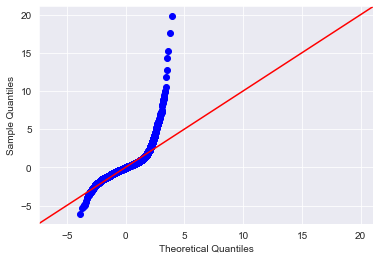

In [250]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

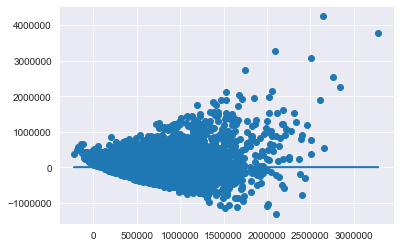

In [253]:

plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))])


These plots look horrible. I'm going to try rerunning everything that doesn't have a high vif.

In [254]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,1.770512
1,bathrooms,3.391302
2,sqft_living,4.896267
3,sqft_lot,1.098449
4,floors,2.334314
5,waterfront,1.025944
6,grade,2.993499
7,sqft_basement,1.724735
8,zipcode_pop,15.233215
9,listings_in_zip,13.757574


In [256]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
              'hot_market_score', 'recent_renov']
X = data.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,19.527830
1,bathrooms,24.881135
2,sqft_living,19.799282
3,sqft_lot,1.217424
4,floors,15.465796
5,waterfront,1.026986
6,grade,41.327450
7,sqft_basement,2.253752
8,hot_market_score,11.658247
9,recent_renov,1.034011


But then it increases the other VIFs!

Let me see if the preprocessed model fits the q-q plot better and the scatter plot better

In [259]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
prepr_model = ols(formula=formula, data=preprocessed).fit()
prepr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2356.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:34:52   Log-Likelihood:            -2.9572e+05
No. Observations:               21592   AIC:                         5.915e+05
Df Residuals:                   21574   BIC:                         5.916e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.574e+05   1.66e+04    -21.592      0.000    -3.9e+05   -3.25e+05
bedrooms         -3.923e+04   2152.648    -18.225      0.000   -4.35e+04    -3.5e+04
bathrooms          4.66e+04   3513.094     13.264      0.000    3.97e+04    5.35e+04
sqft_living       1.529e+05   3234.706     47.282      0.000    1.47e+05    1.59e+05
sqft_lot         -9123.9873   1532.118     -5.955      0.000   -1.21e+04   -6120.923
floors            8059.8404   4139.345      1.947      0.052     -53.582    1.62e+04
waterfront        7.397e+05   1.81e+04     40.804      0.000    7.04e+05    7.75e+05
grade             1.327e+05   2158.129     61.504      0.000    1.29e+05    1.37e+05
sqft_basement     7315.9933   1919.833      3.811      0.000    3552.979    1.11e+04
zipcode_pop      -4.443e+04   5705.558     -7.788      0.000   -5.56e+04   -3.33e+04
listings_in_zip   3.163e+04   5422.171      5.834      0.000     2.1e+04    4.23e+04
hot_market_score -1.679e+04   4173.391     -4.023      0.000    -2.5e+04   -8607.510
recent_renov      4.877e+04   9821.553      4.966      0.000    2.95e+04     6.8e+04
group_yr_built_1  1.015e+05   5507.002     18.426      0.000    9.07e+04    1.12e+05
group_yr_built_2  7.779e+04   5182.612     15.011      0.000    6.76e+04     8.8e+04
group_yr_built_3  -523.5528   3999.192     -0.131      0.896   -8362.266    7315.160
group_yr_built_4 -1.202e+05   4284.044    -28.062      0.000   -1.29e+05   -1.12e+05
group_yr_built_5 -2.114e+05   4887.220    -43.261      0.000   -2.21e+05   -2.02e+05
group_yr_built_6 -2.045e+05   5481.713    -37.299      0.000   -2.15e+05   -1.94e+05
==============================================================================
Omnibus:                    14945.980   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           758872.084
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      31.518   Cond. No.                     5.26e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

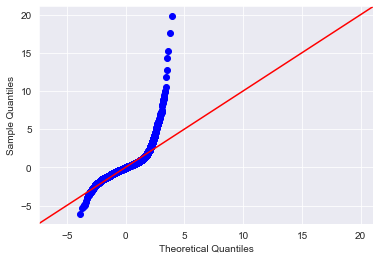

In [260]:
fig = sm.graphics.qqplot(prepr_model.resid, dist=stats.norm, line='45', fit=True)

No still just as bad

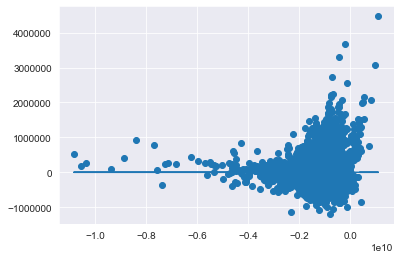

In [263]:
plt.scatter(prepr_model.predict(data[x_cols]), model.resid)
plt.plot(prepr_model.predict(data[x_cols]), [0 for i in range(len(data))])

# Trying to get a better fit

## Rerun the model with less expensive houses

In [266]:
data.price.describe()

count    2.159200e+04
mean     5.396811e+05
std      3.628833e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.060000e+06
Name: price, dtype: float64

The mean price of the house is \\$540,000. There are probably some very expensive outliers. I'll limit it to \\$800,000 or less.

In [268]:
cheap_homes = data[data.price <= 800000]

In [275]:
round(cheap_homes.shape[0]/data.shape[0], 3)*100

86.4

Still has 86% of the lisitings.

In [277]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
cheap_home_model = ols(formula=formula, data=cheap_homes).fit()
cheap_home_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1070.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:20:53   Log-Likelihood:            -2.4383e+05
No. Observations:               18652   AIC:                         4.877e+05
Df Residuals:                   18634   BIC:                         4.878e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.362e+05   1.14e+04    -29.587      0.000   -3.58e+05   -3.14e+05
bedrooms         -7395.9864   1297.287     -5.701      0.000   -9938.788   -4853.185
bathrooms         2.558e+04   2147.620     11.909      0.000    2.14e+04    2.98e+04
sqft_living         53.8044      2.320     23.195      0.000      49.258      58.351
sqft_lot             0.0969      0.025      3.909      0.000       0.048       0.145
floors            2.399e+04   2459.735      9.753      0.000    1.92e+04    2.88e+04
waterfront        1.273e+05   1.96e+04      6.513      0.000     8.9e+04    1.66e+05
grade             8.509e+04   1348.571     63.093      0.000    8.24e+04    8.77e+04
sqft_basement       31.4725      2.824     11.144      0.000      25.937      37.008
zipcode_pop         -1.6803      0.281     -5.985      0.000      -2.231      -1.130
listings_in_zip    155.2724     22.807      6.808      0.000     110.569     199.975
hot_market_score  4120.8479    690.166      5.971      0.000    2768.060    5473.635
recent_renov     -1225.7545   6719.132     -0.182      0.855   -1.44e+04    1.19e+04
group_yr_built_1  4.814e+04   3315.233     14.520      0.000    4.16e+04    5.46e+04
group_yr_built_2  2.608e+04   3178.320      8.205      0.000    1.98e+04    3.23e+04
group_yr_built_3 -3.347e+04   2396.485    -13.968      0.000   -3.82e+04   -2.88e+04
group_yr_built_4 -9.819e+04   2697.340    -36.403      0.000   -1.03e+05   -9.29e+04
group_yr_built_5 -1.375e+05   3137.506    -43.840      0.000   -1.44e+05   -1.31e+05
group_yr_built_6 -1.412e+05   3568.340    -39.574      0.000   -1.48e+05   -1.34e+05
==============================================================================
Omnibus:                      434.641   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.243
Skew:                           0.380   Prob(JB):                    9.42e-102
Kurtosis:                       3.142   Cond. No.                     1.52e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

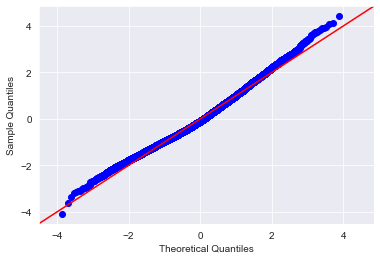

In [278]:
fig = sm.graphics.qqplot(cheap_home_model.resid, dist=stats.norm, line='45', fit=True)

**SWEET!** It looks a lot better. I'll limit my model to cheaper houses.

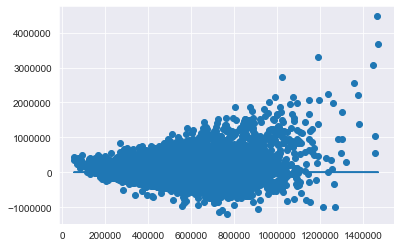

In [280]:
plt.scatter(cheap_home_model.predict(data[x_cols]), model.resid)
plt.plot(cheap_home_model.predict(data[x_cols]), [0 for i in range(len(data))])

This one doesn't look as good, but I don't know quite what it means. Ask Yish about it.

Check VIFs

In [282]:
cheap_home_model

In [283]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_4','group_yr_built_5','group_yr_built_6',]
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,1.792950
1,bathrooms,2.996642
2,sqft_living,3.617167
3,sqft_lot,1.090805
4,floors,2.440033
5,waterfront,1.006921
6,grade,2.213058
7,sqft_basement,1.673116
8,zipcode_pop,15.158072
9,listings_in_zip,13.559883


# Eliminate variables to reduce colinearity

Eliminate group_yr_built_4

In [284]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
              'group_yr_built_3','group_yr_built_5','group_yr_built_6',]
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,25.078173
1,bathrooms,28.602864
2,sqft_living,25.739936
3,sqft_lot,1.254091
4,floors,20.173343
5,waterfront,1.007646
6,grade,86.263731
7,sqft_basement,2.307179
8,zipcode_pop,72.909133
9,listings_in_zip,71.778737


Elminate 'grade'

In [285]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement',
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6', ]
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,25.061550
1,bathrooms,28.070160
2,sqft_living,22.988093
3,sqft_lot,1.253956
4,floors,19.260597
5,waterfront,1.007275
6,sqft_basement,2.303247
7,zipcode_pop,39.134705
8,listings_in_zip,48.644306
9,hot_market_score,26.198476


Elminate listings_in_zip

In [286]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement',
               'zipcode_pop', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6', ]
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,23.408651
1,bathrooms,27.778912
2,sqft_living,22.987081
3,sqft_lot,1.238303
4,floors,18.767456
5,waterfront,1.006125
6,sqft_basement,2.302111
7,zipcode_pop,7.205981
8,hot_market_score,9.657511
9,recent_renov,1.049532


Eliminate zipcode_pop

In [287]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement',
               'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6', ]
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,21.314132
1,bathrooms,27.454416
2,sqft_living,22.859386
3,sqft_lot,1.230602
4,floors,17.759829
5,waterfront,1.005262
6,sqft_basement,2.299720
7,hot_market_score,9.643590
8,recent_renov,1.047787
9,group_yr_built_1,1.308735


Eliminate bedrooms and bathrooms

In [288]:
chosen_cols = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement',
               'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6', ]
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,sqft_living,13.164824
1,sqft_lot,1.221147
2,floors,14.534843
3,waterfront,1.004472
4,sqft_basement,2.188031
5,hot_market_score,8.902783
6,recent_renov,1.038101
7,group_yr_built_1,1.296859
8,group_yr_built_2,1.345572
9,group_yr_built_3,1.730343


Eliminate floors

In [290]:
chosen_cols = ['sqft_living', 'sqft_lot', 'waterfront', 'sqft_basement', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6']
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,sqft_living,9.198568
1,sqft_lot,1.210154
2,waterfront,1.004247
3,sqft_basement,1.960502
4,hot_market_score,7.879661
5,recent_renov,1.036696
6,group_yr_built_1,1.219743
7,group_yr_built_2,1.277555
8,group_yr_built_3,1.670741
9,group_yr_built_5,1.995054


In [297]:
df_heatmap = cheap_homes[['sqft_living', 'sqft_lot', 'waterfront', 'sqft_basement', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6']]

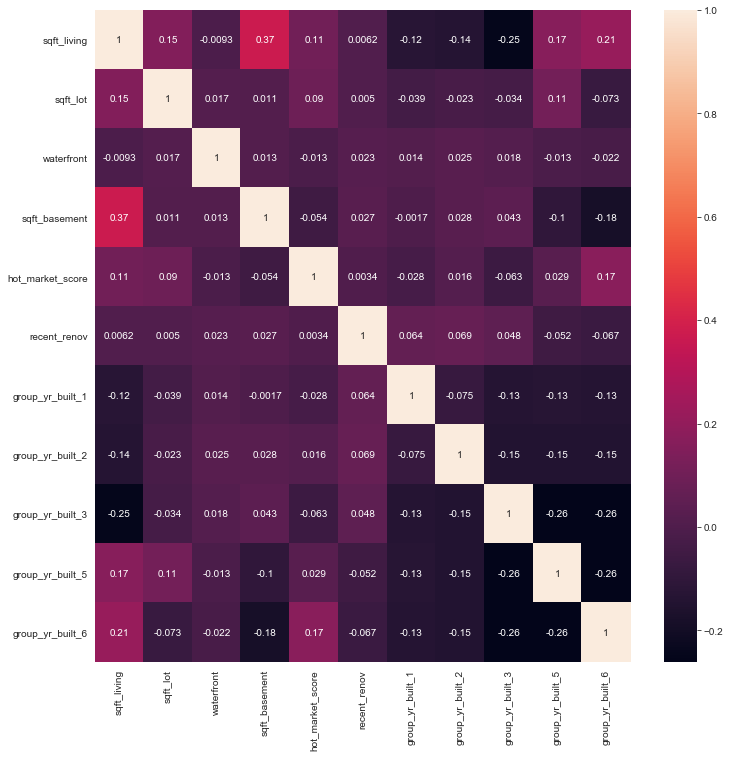

In [298]:
plt.figure(figsize=(12,12))
sns.heatmap(df_heatmap.corr(), annot=True);

In [299]:
chosen_cols = ['sqft_living', 'sqft_lot', 'waterfront', 'sqft_basement', 'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6']
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
cheap_home_model = ols(formula=formula, data=cheap_homes).fit()
cheap_home_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     952.2
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:20:11   Log-Likelihood:            -2.4602e+05
No. Observations:               18652   AIC:                         4.921e+05
Df Residuals:                   18640   BIC:                         4.922e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.374e+04   4516.540     14.113      0.000    5.49e+04    7.26e+04
sqft_living        131.9463      1.712     77.054      0.000     128.590     135.303
sqft_lot             0.0038      0.027      0.140      0.889      -0.050       0.058
waterfront        1.278e+05   2.19e+04      5.823      0.000    8.48e+04    1.71e+05
sqft_basement        3.2845      2.910      1.129      0.259      -2.419       8.988
hot_market_score  7672.2405    279.381     27.462      0.000    7124.628    8219.853
recent_renov      2.853e+04   7502.958      3.803      0.000    1.38e+04    4.32e+04
group_yr_built_1  1.175e+05   4260.983     27.569      0.000    1.09e+05    1.26e+05
group_yr_built_2      1e+05   4014.114     24.913      0.000    9.21e+04    1.08e+05
group_yr_built_3  3.862e+04   2908.362     13.280      0.000    3.29e+04    4.43e+04
group_yr_built_5  7525.5266   2987.061      2.519      0.012    1670.614    1.34e+04
group_yr_built_6  2.496e+04   3108.120      8.029      0.000    1.89e+04     3.1e+04
==============================================================================
Omnibus:                      521.205   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.791
Skew:                           0.394   Prob(JB):                    2.74e-117
Kurtosis:                       2.738   Cond. No.                     8.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [301]:
chosen_cols = ['sqft_living', 'sqft_lot', 'waterfront', 'sqft_basement', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6']
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
cheap_home_model = ols(formula=formula, data=cheap_homes).fit()
cheap_home_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     934.2
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:21:27   Log-Likelihood:            -2.4639e+05
No. Observations:               18652   AIC:                         4.928e+05
Df Residuals:                   18641   BIC:                         4.929e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.439e+05   3516.576     40.911      0.000    1.37e+05    1.51e+05
sqft_living        134.9259      1.743     77.405      0.000     131.509     138.343
sqft_lot             0.0720      0.028      2.587      0.010       0.017       0.127
waterfront        1.205e+05   2.24e+04      5.386      0.000    7.66e+04    1.64e+05
sqft_basement        0.5268      2.966      0.178      0.859      -5.288       6.341
recent_renov      3.098e+04   7652.486      4.048      0.000     1.6e+04     4.6e+04
group_yr_built_1  1.218e+05   4343.207     28.048      0.000    1.13e+05     1.3e+05
group_yr_built_2  1.086e+05   4081.817     26.615      0.000    1.01e+05    1.17e+05
group_yr_built_3  4.251e+04   2963.016     14.347      0.000    3.67e+04    4.83e+04
group_yr_built_5  1.357e+04   3038.513      4.467      0.000    7617.534    1.95e+04
group_yr_built_6  3.914e+04   3126.191     12.521      0.000     3.3e+04    4.53e+04
==============================================================================
Omnibus:                      493.752   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.200
Skew:                           0.271   Prob(JB):                     5.05e-85
Kurtosis:                       2.547   Cond. No.                     8.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

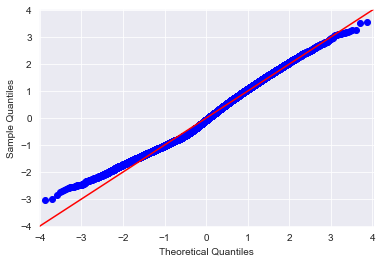

In [302]:
fig = sm.graphics.qqplot(cheap_home_model.resid, dist=stats.norm, line='45', fit=True)

In [303]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_basement',
               'hot_market_score', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_5', 'group_yr_built_6', ]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
cheap_home_model = ols(formula=formula, data=cheap_homes).fit()
cheap_home_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     826.0
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:25:20   Log-Likelihood:            -2.4568e+05
No. Observations:               18652   AIC:                         4.914e+05
Df Residuals:                   18637   BIC:                         4.915e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.346e+04   5981.919      5.594      0.000    2.17e+04    4.52e+04
bedrooms         -1.986e+04   1414.082    -14.045      0.000   -2.26e+04   -1.71e+04
bathrooms         3.528e+04   2364.143     14.923      0.000    3.06e+04    3.99e+04
sqft_living        121.6484      2.242     54.249      0.000     117.253     126.044
sqft_lot             0.0248      0.027      0.914      0.361      -0.028       0.078
floors             4.19e+04   2695.131     15.546      0.000    3.66e+04    4.72e+04
waterfront        1.172e+05   2.16e+04      5.436      0.000    7.49e+04    1.59e+05
sqft_basement       13.5497      3.091      4.384      0.000       7.491      19.608
hot_market_score  7704.8106    275.727     27.944      0.000    7164.360    8245.261
recent_renov      9586.7042   7415.637      1.293      0.196   -4948.621    2.41e+04
group_yr_built_1  1.108e+05   4273.210     25.940      0.000    1.02e+05    1.19e+05
group_yr_built_2  9.488e+04   4027.380     23.559      0.000     8.7e+04    1.03e+05
group_yr_built_3  4.363e+04   2911.545     14.985      0.000    3.79e+04    4.93e+04
group_yr_built_5 -2.827e+04   3235.310     -8.737      0.000   -3.46e+04   -2.19e+04
group_yr_built_6 -3.312e+04   3824.574     -8.659      0.000   -4.06e+04   -2.56e+04
==============================================================================
Omnibus:                      443.938   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.725
Skew:                           0.376   Prob(JB):                    7.40e-102
Kurtosis:                       2.813   Cond. No.                     8.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [304]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 
              'yr_built']
X = cheap_homes.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,bedrooms,25.946077
1,bathrooms,23.869921
2,sqft_living,30.171108
3,sqft_lot,1.238028
4,floors,15.527696
5,waterfront,1.007815
6,grade,139.296303
7,sqft_basement,2.250674
8,zipcode_pop,133.734690
9,listings_in_zip,116.708647


In [306]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_basement', 
               'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'recent_renov', 
              'yr_built']
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
cheap_home_model = ols(formula=formula, data=cheap_homes).fit()
cheap_home_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1399.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:47:05   Log-Likelihood:            -2.4383e+05
No. Observations:               18652   AIC:                         4.877e+05
Df Residuals:                   18638   BIC:                         4.878e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.122e+06   7.68e+04     53.659      0.000    3.97e+06    4.27e+06
bedrooms         -9694.0131   1273.500     -7.612      0.000   -1.22e+04   -7197.838
bathrooms          2.73e+04   2112.806     12.922      0.000    2.32e+04    3.14e+04
sqft_living         53.5601      2.318     23.104      0.000      49.016      58.104
sqft_lot             0.0559      0.025      2.272      0.023       0.008       0.104
floors            3.825e+04   2182.372     17.528      0.000     3.4e+04    4.25e+04
waterfront        1.261e+05   1.95e+04      6.453      0.000    8.78e+04    1.64e+05
grade             8.572e+04   1349.660     63.514      0.000    8.31e+04    8.84e+04
sqft_basement       31.7056      2.803     11.311      0.000      26.211      37.200
zipcode_pop         -1.8556      0.280     -6.638      0.000      -2.404      -1.308
listings_in_zip    162.2649     22.741      7.135      0.000     117.691     206.839
hot_market_score  4300.2444    687.342      6.256      0.000    2952.992    5647.497
recent_renov     -6383.4451   6719.857     -0.950      0.342   -1.96e+04    6788.088
yr_built         -2314.2576     40.946    -56.520      0.000   -2394.515   -2234.000
==============================================================================
Omnibus:                      474.094   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.342
Skew:                           0.392   Prob(JB):                    5.58e-112
Kurtosis:                       3.211   Cond. No.                     3.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21592 entries, 0 to 21591
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21592 non-null  float64
 1   bedrooms          21592 non-null  int64  
 2   bathrooms         21592 non-null  float64
 3   sqft_living       21592 non-null  int64  
 4   sqft_lot          21592 non-null  int64  
 5   floors            21592 non-null  float64
 6   waterfront        21592 non-null  int64  
 7   grade             21592 non-null  int64  
 8   sqft_basement     21592 non-null  float64
 9   yr_built          21592 non-null  int64  
 10  yr_renovated      21592 non-null  int64  
 11  zipcode           21592 non-null  int64  
 12  zipcode_pop       21592 non-null  int64  
 13  listings_in_zip   21592 non-null  int64  
 14  hot_market_score  21592 non-null  float64
 15  recent_renov      21592 non-null  int64  
 16  group_yr_built_1  21592 non-null  uint8 